##Loading the dataset
## Link to the dataset:
https://huggingface.co/datasets/cnamuangtoun/resume-job-description-fit

In [1]:
#Loading the dataset from hugging face
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


In [3]:
#imports
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import numpy as np

In [4]:
#loading the dataset
dataset = load_dataset("cnamuangtoun/resume-job-description-fit")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv:   0%|          | 0.00/53.4M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/15.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6241 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1759 [00:00<?, ? examples/s]

In [5]:
train = dataset['train']
test = dataset['test']
train_data = pd.DataFrame(train)
test_data = pd.DataFrame(test)

In [6]:
train_data.columns

Index(['resume_text', 'job_description_text', 'label'], dtype='object')

In [7]:
train_data['label'].unique()

array(['No Fit', 'Potential Fit', 'Good Fit'], dtype=object)

In [8]:
train_data.shape

(6241, 3)

In [9]:
test_data.shape

(1759, 3)

In [10]:
train_data.head(5)

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit


In [11]:
train_data[train_data['label'] == 'Good Fit'].shape

(1542, 3)

In [12]:
train_data[train_data['label'] == 'Potential Fit'].shape

(1556, 3)

In [13]:
train_data[train_data['label'] == 'No Fit'].shape

(3143, 3)

<ipython-input-14-621b858b4403>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')


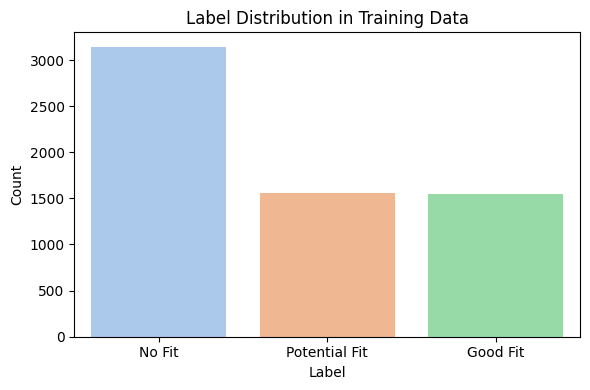

In [14]:
# Count label occurrences
label_counts = train_data['label'].value_counts()

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')
plt.title("Label Distribution in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


##Mild Imbalance - not extreme, any classifier should be able to handle it

#Preprocessing Data

 When using semantic embeddings, especially with modern pre-trained models like BERT, RoBERTa, or Sentence Transformers, you typically do not need to perform traditional preprocessing steps like:

Removing stop words

Lemmatization or stemming

Lowercasing (often optional, and some models are case-sensitive)

Removing punctuation (again, model-dependent)

Why?
Semantic embedding models are contextual — they’re trained to understand language structure, grammar, and meaning in context, so removing stop words or lemmatizing might actually harm performance because it removes information the model uses for understanding.

Minimal preprocessing you may still consider:
Stripping extra whitespace

Correcting obvious typos (optional, based on use-case)

Truncating very long inputs (since models have max token limits)

In [15]:
train_data['resume_text'][0]

"SummaryHighly motivated Sales Associate with extensive customer service and sales experience. Outgoing sales professional with track record of driving increased sales, improving buying experience and elevating company profile with target market.\nHighlights-Soft Skills: Public Speaking, Public Relations, Team Building, Project Management, Procedure writing, Staff Supervision and Management, Ability to interface with professionals on all levels. Accomplishments, Honors, and Activities -Board of Directors Member for the Food Bank of Corpus Christi from November 2010 to April 2013. -Held Life Insurance License -Basketball Official (Referee) High School Varsity Level.\nExperienceAccountant,08/2014-05/2015Aspirus–Owen,WI,Perform daily and routine accounting functions for two main companies and five small royalty companies. Responsibilities include but are not limited to the following: Accounts Payable, Accounts Receivable, Manage and reconcile funds for multiple banks accounts, Payroll, Pe

Around 800 words

In [16]:
train_data['job_description_text'][0]

"Net2Source Inc. is an award-winning total workforce solutions company recognized by Staffing Industry Analysts for our accelerated growth of 300% in the last 3 years with over 5500+ employees globally, with over 30+ locations in the US and global operations in 32 countries. We believe in providing staffing solutions to address the current talent gap  Right Talent  Right Time  Right Place  Right Price and acting as a Career Coach to our consultants.  \nRole: Basel Business AnalystLocation: Washington, D.C.Work Mode: HybridHire Type: 6+ Month Contract (extendable)\nJD: Role Specific Experience: 6+ years of relevant technical and business work experience The Candidates who have worked on Basel related projects in Credit risks or at least are aware of credit risk.  Banking & Financial domain experience, along with knowledge of risk management, familiarity with concepts of finance and accounting  Proficiency in MS Excel  Experience in defining and implementing technology solutions for a ma

In [17]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 7.0 MB/s eta 0:00:00


#With batching



(TRY WITH OTHER CLASSIFIERS, SUCH AS NAIVE BAYES, XG-BOOST, ETC AND TRY TO IMPROVE THE SCORE)

In [34]:

# TF-IDF based features and Naive Bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Vectorize combined text of resume + job description
vectorizer = TfidfVectorizer(max_features=5000)

train_concat = (train_data['resume_text'] + " " + train_data['job_description_text']).tolist()
test_concat = (test_data['resume_text'] + " " + test_data['job_description_text']).tolist()

X_train = vectorizer.fit_transform(train_concat)
X_test = vectorizer.transform(test_concat)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])

# Train Naive Bayes
nb_model = MultinomialNB(alpha=0.01)
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Precision: 0.4508
Recall:    0.4878
F1 Score:  0.4378


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
}

grid_search = GridSearchCV(
    MultinomialNB(),
    param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Best weighted F1 score:", grid_search.best_score_)


Best alpha: 0.01
Best weighted F1 score: 0.523088403566673


##Pretty bad results,,

**Suggestions from Chatgpt:**
| Approach | Action |
|---------|--------|
| 🔄 **Balance the dataset** | Try upsampling/downsampling to fix label imbalance |
| 🔁 **Chunk long inputs** | Split resumes/JDs into segments, embed, then average |
| 🔍 **Add handcrafted features** | Add `length`, `keyword match count`, `TF-IDF cosine score`, etc. |
| 🤖 **Use better classifiers** | Try `RandomForest`, `XGBoost`, or `SVM` |
| 🔧 **Threshold tuning** | Adjust decision thresholds for better precision/recall tradeoff |
| 🧠 **Fine-tune embeddings** | Fine-tune Sentence-BERT on your own dataset (advanced but effective) |



In [23]:
# Preprocessing function (make sure this is run before calling predict_fit)
def preprocess_text(text):
    return text.lower().strip()

# Prediction function using TF-IDF + Naive Bayes
def predict_fit(resume_text, job_description_text):
    # Preprocess both inputs
    resume_text = preprocess_text(resume_text)
    job_description_text = preprocess_text(job_description_text)

    # Combine and vectorize
    combined_text = [resume_text + " " + job_description_text]
    X = vectorizer.transform(combined_text)

    # Predict and decode label
    prediction = nb_model.predict(X)
    return label_encoder.inverse_transform(prediction)[0]

# Example usage
custom_resume = """Experienced software engineer with expertise in Python, Django, and REST API development. Worked on building scalable backend systems for e-commerce applications."""
custom_jd = """Looking for a backend developer skilled in Python and RESTful API design, preferably with Django experience."""

predicted_label = predict_fit(custom_resume, custom_jd)
print(f"Predicted Fit Category: {predicted_label}")


Predicted Fit Category: No Fit


##Step 2:

##Semantic Similarity score

In [27]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load model and compute embeddings
embedder = SentenceTransformer('all-MiniLM-L6-v2')

resume_embeds = embedder.encode(test_data['resume_text'].tolist(), convert_to_tensor=False)
jd_embeds = embedder.encode(test_data['job_description_text'].tolist(), convert_to_tensor=False)

# Compute similarity scores
similarity_scores = cosine_similarity(resume_embeds, jd_embeds)
diagonal_scores = np.diag(similarity_scores)  # resume vs own JD


ml_predictions = nb_model.predict(X_test)
ml_labels = label_encoder.inverse_transform(ml_predictions)

intersection_indices = [
    i for i, (label, score) in enumerate(zip(ml_labels, diagonal_scores))
    if label == 'Good Fit' and score >= 0.6
]

intersected_resumes = test_data.iloc[intersection_indices][['resume_text', 'job_description_text']]
intersected_resumes.reset_index(drop=True, inplace=True)
print(intersected_resumes.head())

                                         resume_text  \
0  Career OverviewExpert level user interface fro...   
1  Summary5+ years experience in development of W...   
2  SummarySkilled and technically qualified Java\...   
3  Professional SummaryEnthusiastic computer engi...   
4  Professional SummaryResults-oriented and innov...   

                                job_description_text  
0  Role: Java Developer Duration: 12 months Requi...  
1  Role: Java Developer Duration: 12 months Requi...  
2  Role: Java Developer Duration: 12 months Requi...  
3  Job Title: Software DeveloperLocation: Clevela...  
4  Role: Java Developer Duration: 12 months Requi...  


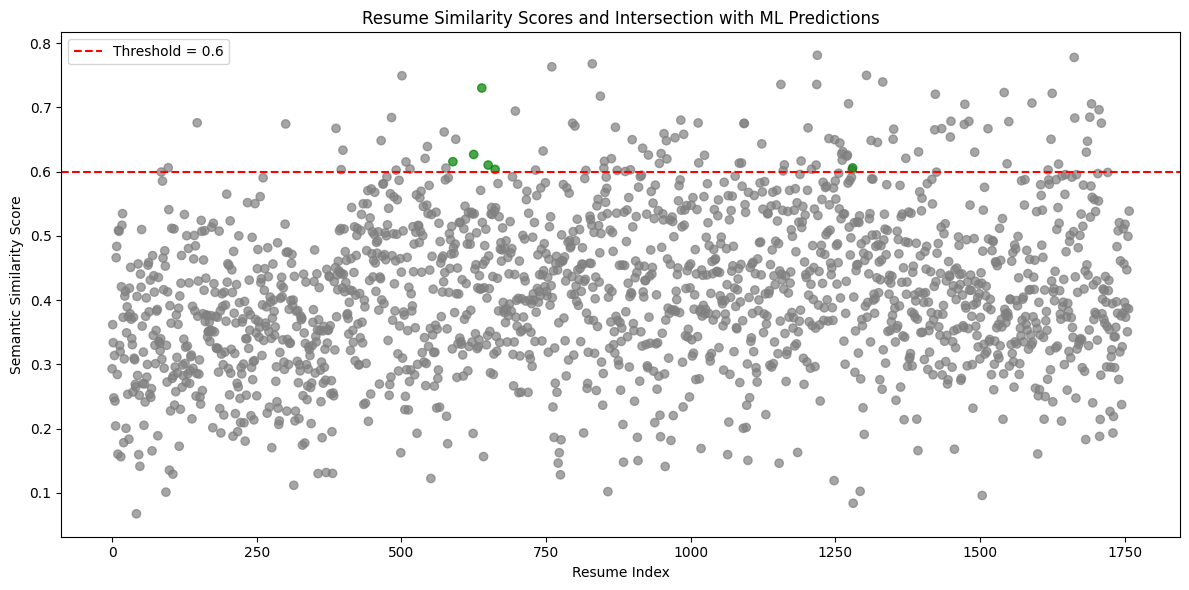

In [30]:
# Example: define threshold first
threshold = 0.6

# Prepare color: green for intersection, gray otherwise
colors = ['green' if i in intersection_indices else 'gray' for i in range(len(diagonal_scores))]

plt.figure(figsize=(12, 6))
plt.scatter(range(len(diagonal_scores)), diagonal_scores, c=colors, alpha=0.7)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Resume Index')
plt.ylabel('Semantic Similarity Score')
plt.title('Resume Similarity Scores and Intersection with ML Predictions')
plt.legend()
plt.tight_layout()
plt.show()


               precision    recall  f1-score   support

     Good Fit       0.39      0.15      0.22       458
       No Fit       0.51      0.89      0.65       857
Potential Fit       0.46      0.11      0.17       444

     accuracy                           0.50      1759
    macro avg       0.45      0.38      0.35      1759
 weighted avg       0.47      0.50      0.42      1759



<Axes: >

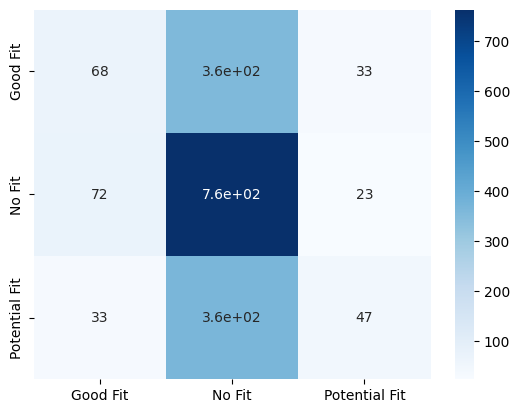

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = nb_model.predict(X_test)

# Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')

In [32]:
print(f"Strong semantic + ML Good Fit matches: {len(intersection_indices)} out of {len(test_data)}")
for i in intersection_indices[:5]:
    print(f"\nSimilarity: {diagonal_scores[i]:.2f}")
    print(f"Resume:\n{test_data.iloc[i]['resume_text'][:300]}")
    print(f"JD:\n{test_data.iloc[i]['job_description_text'][:300]}")


Strong semantic + ML Good Fit matches: 6 out of 1759

Similarity: 0.62
Resume:
Career OverviewExpert level user interface front end web developer with high-quality skills, professional attitude, and conscientious commitment looking to give star-quality work to a company that cultivates an environment of creativity, caring, fun and professionalism.
QualificationsWeb coding lang
JD:
Role: Java Developer Duration: 12 months Required Skills Developed web application using Java, J2EE, HTML, CSS, JavaScript, jQuery, JSON, XML, JavaScript Framework, Bootstrap 3 or 4, Angular, JSP (Java Server Pages)Angular Framework, AJAX

Similarity: 0.63
Resume:
Summary5+ years experience in development of Web and Enterprise applications using JAVA/J2EE Technologies. Experience with full life cycle of software development: use cases, requirements, high level design, detail design, coding, testing, debugging and maintenance. Ability to collaborate effectivel
JD:
Role: Java Developer Duration: 12 months Requi